
# Mission to Titan — Math & Coding Workbook (A–C)

This workbook integrates **first‑year calculus** and **intro Python** to model a simplified heliocentric transfer from **Earth** to **Saturn’s orbit** (toward **Titan**). You’ll alternate **derivations**, **guided code**, and **visualizations**.

**Assumptions:** circular, coplanar orbits; Sun‑only gravity; impulsive burns.



## Scenario & Uniqueness (Group Code)

Set your `GROUP_CODE` to `GXX` (e.g., `G01`, `G02`, …). The group code deterministically seeds the **current Earth–Saturn phase angle**.

**Definition (phase):** Let $\,\phi\,$ be the angle from the Earth–Sun line to the Saturn–Sun line, measured counter‑clockwise. This is the **current angular separation** of Saturn ahead of Earth. We use $\,\phi\,$ to decide if we can launch today or must **wait** for the correct Hohmann alignment.


In [1]:

from hashlib import sha256
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Arc
rcParams['animation.embed_limit'] = 30  # MB; raise if you really need larger animations

# === GROUP CODE ===
GROUP_CODE = "G02"  # change to your group's GXX



############################## DO NOT EDIT BELOW THIS LINE #######################################################################################################

def code_to_phase(code: str) -> float:
    """Deterministic phase angle in [0, 2π) from a short code like 'G07'."""
    h = sha256(code.encode()).hexdigest()
    val = int(h[:8], 16)/16**8
    return 2*np.pi*val

phi = code_to_phase(GROUP_CODE)  # current Earth→Saturn phase angle (rad)

# Physical constants & radii
G = 6.67430e-11           # m^3/(kg s^2)
M_sun = 1.98847e30        # kg
mu = G*M_sun              # m^3/s^2
AU = 1.495978707e11       # m
r_earth  = 1.0   * AU     # m
r_saturn = 9.537 * AU     # m

# Time helpers
day  = 24*3600
year = 365.25*day

# Narrative knobs (for reflections/constraints)
SCENARIO = {
    "dv_budget_cap_kms": 7.0,
    "arrival_penalty_kms": 0.3,
    "instrument": "Aerial drone sampler",
    "max_travel_time_yrs": 8.5,
}

print(f"[Scenario] GROUP_CODE={GROUP_CODE} | φ={phi:.3f} rad ({np.degrees(phi):.1f}°)")
print(f"  Δv cap = {SCENARIO['dv_budget_cap_kms']:.2f} km/s | arrival penalty = {SCENARIO['arrival_penalty_kms']:.2f} km/s")
print(f"  Max travel time = {SCENARIO['max_travel_time_yrs']:.2f} years")


[Scenario] GROUP_CODE=G02 | φ=1.814 rad (103.9°)
  Δv cap = 7.00 km/s | arrival penalty = 0.30 km/s
  Max travel time = 8.50 years



### Symbols & Glossary

- **Central parameter:** $\,\mu = GM_\odot\,$ (Sun), units m$^3$/s$^2$.
- **Distance:** $\,r\,$ = instantaneous distance from the Sun (the focus).  
  • For a **circle**, $\,r=a\,$ always.  
  • For an **ellipse**, $\,r\,$ varies between $\,r_p=a(1-e)\,$ and $\,r_a=a(1+e)\,$.
- **Circular radii:** $\,r_1\,$ (Earth’s orbital radius), $\,r_2\,$ (Saturn’s orbital radius).
- **Ellipse geometry:** $\,a\,$ (semi‑major axis), $\,e\,$ (eccentricity), $\,r_p=a(1-e)\,$, $\,r_a=a(1+e)\,$.
- **Transfer ellipse:** $\,a_t\,$ (transfer semi‑major axis), $\,e_t\,$ (transfer eccentricity).
- **Speeds:** $\,v\,$ (instantaneous), $\,v_\text{circ}(r)=\sqrt{\mu/r}\,$ (circular), $\,v_p\,$, $\,v_a\,$ (transfer at perihelion/aphelion).
- **Timing:** $\,P\,$ (orbital period), $\,t_t\,$ (transfer time = half period), $\,n=\sqrt{\mu/a^3}\,$ (mean motion).
- **Burns:** $\,\Delta v_1 = v_p - v_\text{circ}(r_1)\,$, $\,\Delta v_2 = v_\text{circ}(r_2) - v_a\,$.
- **Phase:** $\,\phi\,$ = current Earth→Saturn angular separation (ahead), in radians.



# Section A. Circular Orbits (Forces → Speed)

In a circular orbit, gravity supplies the centripetal force. Using $$F_\text{grav}=\mu m/r^2,\quad F_\text{cent}=mv^2/r,$$ we get the circular‑speed law
$$v(r)=\sqrt{\mu/r}.$$
**Interpretation:** farther out ($r$ larger) ⇒ lower $v$.



### Task A1 — Derive the circular speed (pencil)
From $F_\text{grav}=F_\text{cent}$, derive $\,v=\sqrt{\mu/r}\,$. Explain why outer planets move slower.

### Plot Earth & Saturn **with phase angle $\phi$** (Python)
The following code will draw both circular orbits and show Earth’s and Saturn’s current positions for your `GROUP_CODE`. You do not need to edit the following code. 

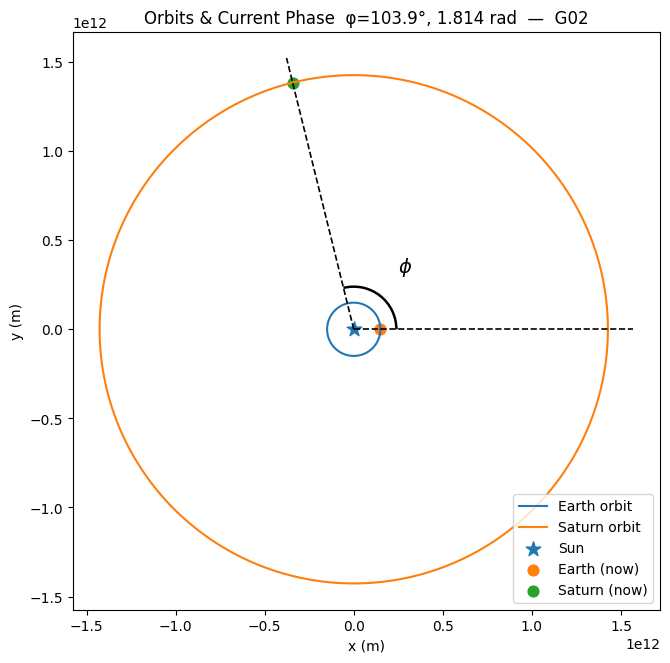

In [2]:
# --- A2: Orbits + current positions + phase angle φ ---

## Do not edit below this line ##


def orbit_circle_xy(r, num=720):
    th = np.linspace(0, 2*np.pi, num, endpoint=True)
    return r*np.cos(th), r*np.sin(th)

# Orbits
xE, yE = orbit_circle_xy(r_earth)
xS, yS = orbit_circle_xy(r_saturn)

# Current positions (Earth at angle 0, Saturn at angle φ)
Ex, Ey = r_earth*np.cos(0.0),  r_earth*np.sin(0.0)
Sx, Sy = r_saturn*np.cos(phi), r_saturn*np.sin(phi)

fig, ax = plt.subplots(figsize=(6.8, 6.8))
ax.plot(xE, yE, label="Earth orbit")
ax.plot(xS, yS, label="Saturn orbit")
ax.scatter([0], [0], marker="*", s=120, label="Sun")
ax.scatter([Ex], [Ey], s=60, label="Earth (now)")
ax.scatter([Sx], [Sy], s=60, label="Saturn (now)")

# --- Radial guide lines from the Sun (so φ is clearly the angle between them) ---
L = 1.1 * r_saturn        # length of guide rays (well outside Earth’s orbit)
ax.plot([0, L], [0, 0], linestyle="--", linewidth=1.2, color="k")  # Earth ray (θ=0)
ax.plot([0, L*np.cos(phi)], [0, L*np.sin(phi)], linestyle="--", linewidth=1.2, color="k")  # Saturn ray (θ=φ)

# --- Phase arc φ (centered at the Sun), placed farther from Earth’s orbit ---
arc_r = 1.6 * r_earth    # increase to move arc away from Earth’s orbit (try 1.8 if you want even bigger)
arc = Arc((0, 0),
          width=2*arc_r, height=2*arc_r, angle=0,
          theta1=0, theta2=np.degrees(phi),
          linewidth=1.8, color="k")
ax.add_patch(arc)

# Label φ at the midpoint of the arc
mid = phi/2.0
ax.text(1.7*arc_r*np.cos(mid), 1.7*arc_r*np.sin(mid), r"$\phi$", fontsize=14)

# Axes/legend
ax.set_aspect("equal", "box")
ax.set_xlabel("x (m)"); ax.set_ylabel("y (m)")
ax.set_title(f"Orbits & Current Phase  φ={np.degrees(phi):.1f}°, {np.round(phi,3)} rad  —  {GROUP_CODE}")
ax.legend(loc="lower right")
plt.tight_layout(); plt.show()


### Task A3 — Compute circular speeds (Python)
Implement `v_circ(r, mu)` and evaluate at Earth and Saturn. Print in **km/s**.


In [3]:
# Circular orbital speed function
def v_circ(r, mu):
    """Circular orbital speed at radius r (Sun-centered)."""
    # YOUR CODE HERE
    cs = np.sqrt(mu/r)
    return cs

print(f"Earth circular speed:  {v_circ(r_earth, mu)/1000:.2f} km/s")
print(f"Saturn circular speed: {v_circ(r_saturn, mu)/1000:.2f} km/s")

Earth circular speed:  29.79 km/s
Saturn circular speed: 9.64 km/s



# Section B. Specific Orbital Energy and the **Vis‑Viva** Equation

**Two equivalent ways to write specific orbital energy:**
1. **Local (at your current position):** $$\epsilon=\frac{v^2}{2}-\frac{\mu}{r},$$ where $r$ is your **current distance from the Sun**.
2. **Global (for the whole ellipse):** $$\epsilon=-\frac{\mu}{2a},$$ where $a$ is the **semi‑major axis** of that ellipse. This is constant everywhere on that orbit.

**Why set them equal?** They are the **same energy** described two ways (instantaneous vs orbit‑wide). Equating them links your current speed to the size of your orbit. Solving for $v$ gives **vis‑viva**:
$$\boxed{\,v(r,a)=\sqrt{\mu\!\left(\frac{2}{r}-\frac{1}{a}\right)}\,}.$$
- $a$ = which ellipse you’re on (fixed for that orbit).  
- $r$ = where you are right now (changes along the ellipse).

**Special cases:**
- Circle: $a=r \Rightarrow v=\sqrt{\mu/r}$.  
- Perihelion/aphelion: with $r_p=a(1-e)$, $r_a=a(1+e)$,
  $$v_p=\sqrt{\frac{\mu}{a}(1+e)},\qquad v_a=\sqrt{\frac{\mu}{a}(1-e)}.$$



### Task B1 — Circular check (pencil)
Using $v^2=\mu/r$, show $\epsilon=-\mu/(2r)$ (which matches $a=r$ in the ellipse formula).

### Task B2 — Code the energy function and compute for Earth & Saturn (Python).


In [4]:
def energy_specific(a, mu):
    """Specific orbital energy for semi-major axis a (J/kg)."""
    # YOUR CODE HERE
    # Apply the vis-viva energy equation
    epsilson= -mu / (2 * a)
    # Return the specific orbital energy
    return epsilson

# Compute specific orbital energy for Earth and Saturn
eps_earth = energy_specific(r_earth, mu)    #Earths orbital energy
eps_saturn = energy_specific(r_saturn, mu)  #Saturns orbital energy

# Display results
print(f"Earth specific orbital energy:  {eps_earth:.2f} J/kg")
print(f"Saturn specific orbital energy: {eps_saturn:.2f} J/kg")


Earth specific orbital energy:  -443577347.02 J/kg
Saturn specific orbital energy: -46511203.42 J/kg


### Task B3 — Reflection (3–4 sentences)
Which orbit is more tightly bound and why? How does $v(r,a)$ change as $r$ increases along the ellipse?





# Section C. Hohmann Transfer (Earth → Saturn)

A **Hohmann transfer** is the lowest‑$\Delta v$ two‑burn transfer between two **coplanar circular** orbits of radii $r_1<r_2$. The transfer path is an ellipse tangent to the circles at the endpoints.

## C0. Geometry and timing — why these formulas?

**Tangency at both ends** means the ellipse’s closest & farthest distances equal the circle radii:
$$r_p=a_t(1-e_t)=r_1,\qquad r_a=a_t(1+e_t)=r_2.$$
Adding/subtracting gives
$$\boxed{\,a_t=\frac{r_1+r_2}{2}\,},\qquad \boxed{\,e_t=\frac{r_2-r_1}{r_2+r_1}\,}.$$
These two values determine the elliptical orbit of the spacecraft.

> **Reminder:** For a circle, the semi‑major axis is just the radius. For our **transfer ellipse**, $a_t$ is the average of perihelion ($r_1$) and aphelion ($r_2$).

**Timing** from Kepler’s Third Law: for any ellipse of size $a$, the period is $P=2\pi\sqrt{a^3/\mu}$. The transfer uses **half** an ellipse, so
$$\boxed{\,t_t=\pi\sqrt{\frac{a_t^3}{\mu}}\,}.$$

**Endpoint speeds** from vis‑viva:
$$v_p=v(r_1,a_t),\qquad v_a=v(r_2,a_t).$$

**Burns** are differences from the circular speeds:
$$\boxed{\,\Delta v_1=v_p-v_\text{circ}(r_1)\,},\qquad \boxed{\,\Delta v_2=v_\text{circ}(r_2)-v_a\,}.$$
(Both $>0$ for outward Hohmann.)



### Task C1 — Show the geometry (pencil)
From $r_p=a_t(1-e_t)=r_1$ and $r_a=a_t(1+e_t)=r_2$, derive $a_t=\tfrac{r_1+r_2}{2}$ and $e_t=\tfrac{r_2-r_1}{r_2+r_1}$.
Then, using vis‑viva, write $v_p$ and $v_a$ explicitly in terms of $r_1,r_2,\mu$.

### Task C2 — Implement the transfer 

In [5]:

# Fill in all the None values below

def vis_viva_speed(r, a, mu):
    """Speed at distance r on an orbit with semi-major axis a (Sun-centered)."""
    # YOUR CODE HERE
    vv_speed= np.sqrt(mu * ( (2/r) - (1/a) ) )
    return vv_speed
def hohmann_outer(r1, r2, mu):
    """Hohmann transfer from circular orbit r1 to r2.
    Returns: a_t, e_t, t_transfer, v_p, v_a, dv1, dv2
    """
    import numpy as np
    # geometry: 
    a_t = (r1 + r2) / 2
    e_t = (r2 - r1) / (r2 + r1)
    # timing (half the period of the transfer ellipse)
    t_transfer = np.pi * np.sqrt(a_t**3 / mu)
    # speeds on transfer at periapsis (at r1) and apoapsis (at r2) using the vis_viva_speed function
    v_p = vis_viva_speed(r1,a_t,mu)#(2/(r1+r2)) * np.sqrt(mu*r2)
    v_a = vis_viva_speed(r2,a_t,mu) #(2/(r1+r2)) * np.sqrt(mu*r1)
    # circular speeds for the inner and outer orbits using the v_circ function
    v1_c = v_circ(r1, mu) #np.sqrt(mu/r1)
    v2_c = v_circ(r2,mu) #np.sqrt(mu/r2)
    # delta-vs (speed changes) at start and end of transfer
    dv1 = v_p - v1_c
    dv2 = v2_c - v_a
    return a_t, e_t, t_transfer, v_p, v_a, dv1, dv2


### Phasing — When can we launch? (role of $\phi$)

We define heliocentric angles $\theta_E(t)$ (Earth) and $\theta_S(t)$ (Saturn), and the **phase**
$$
\phi(t)\;\equiv\;\theta_S(t)-\theta_E(t)\quad\text{(wrapped to }[0,2\pi)\text{)}.
$$
Choose the launch epoch so that $\theta_E(0)=0$. The Hohmann transfer ellipse has perihelion at angle $0$ and aphelion at angle $\pi$.

- Mean motions: $n_1=\sqrt{\mu/r_1^{3}}$ (Earth), $n_2=\sqrt{\mu/r_2^{3}}$ (Saturn).  
- Transfer time (half period): $t_t=\pi\sqrt{a_t^{3}/\mu}$ where $a_t=\tfrac{1}{2}(r_1+r_2)$.

#### Required phase at launch
For rendezvous, the spacecraft must reach aphelion ($\pi$) at $t_t$, **and Saturn must be there**:
$$
\theta_S(t_t)=\pi=\theta_S(0)+n_2 t_t
\quad\Rightarrow\quad
\boxed{\;\phi_\text{req} \;\equiv\;\theta_S(0)\;=\;\mathrm{wrap}_{[0,2\pi)}\!\big(\pi - n_2 t_t\big)\;}
$$
Here, $\mathrm{wrap}_{[0,2\pi)}(x)$ is the remainder after reducing by multiples of $2\pi$.


#### Current phase and its evolution
Let the present Saturn–Earth separation be
$$
\phi_{\text{now}}=\mathrm{wrap}_{[0,2\pi)}\!\big(\theta_S(0)-\theta_E(0)\big)
=\mathrm{wrap}_{[0,2\pi)}\!\big(\theta_S(0)\big).
$$
The phase drifts at the relative rate $n_2-n_1$:
$$
\phi(t) = \phi_{\text{now}} + (n_2-n_1)\,t \quad (\mathrm{mod}\ 2\pi).
$$

#### Next launch opportunity (outer transfer: $r_2>r_1\Rightarrow n_1>n_2$)
Define the **wrapped phase gap**
$$
\Delta\phi \;=\; \mathrm{wrap}_{[0,2\pi)}\!\big(\phi_\text{req} - \phi_{\text{now}}\big)\in[0,2\pi).
$$
Then the **time to the next valid window** is
$$
\boxed{\;t_{\text{wait}} \;=\; \dfrac{\Delta\phi}{\,n_1 - n_2\,}\;}
\qquad\text{and the synodic period is}\qquad
\boxed{\;T_{\text{syn}} \;=\; \dfrac{2\pi}{\,n_1 - n_2\,}\;}
$$

- If $\phi_{\text{now}}<\phi_\text{req} $, then $\Delta\phi$ is small $\Rightarrow$ short wait.  
- If $\phi_{\text{now}}>\phi_\text{req} $ (i.e. Saturn has already passed the point where you need to launch), the wrap makes $\Delta\phi$ close to $2\pi$, so
$$
t_{\text{wait}} \approx T_{\text{syn}} - \text{(a small amount)}.
$$


> **Units.** Use $r_1,r_2$ in meters and $\mu$ in $\mathrm{m}^3/\mathrm{s}^2$ so $t_t$, $t_{\text{wait}}$, and $T_{\text{syn}}$ are in seconds.

Note: you can use `x%(2*np.pi)` to return the value of `x` wrapped by $2\pi$.



### Task C3 — Can we launch *today*? (Total timeline)
1) Compute **wait** $t_\text{wait}$ (years) from your current $\,\phi\,$.  
2) Report **transfer** $t_t$ (years).  
3) **Total** $t_\text{mission}=t_\text{wait}+t_t$; compare to `max_travel_time_yrs`. One‑paragraph conclusion.


In [6]:

#Compute the mean motion for a given r and mu
def mean_motion(r, mu): 
    # YOUR CODE HERE
    m_motion= np.sqrt (mu/r**3)
    return m_motion

#Compute the wait time to alignment for given r1, r2, mu, and current phase phi_now
def wait_time_to_alignment(r1, r2, mu, phi_now):
    a_t,e_t, t_t, *_ = hohmann_outer(r1, r2, mu) #e_t????
    if a_t is None or t_t is None:
        print("Complete hohmann_outer() first.")
        return None
    # Compute the mean motions n1, n2 using the mean_motion function
    n1 = mean_motion(r1, mu)
    n2 = mean_motion(r2, mu)
    # Compute the required phase angle phi_req using the formula in the notebook
    phi_req = (np.pi - n2 * t_t) % (2*np.pi)
    # Compute the wrapped phase difference dphi by wrapping (phi_req - phi_now)
    dphi = (phi_req - phi_now) % (2*np.pi)
    rel  = (n2 - n1)  # Saturn-Earth relative angular speed
    if abs(rel) < 1e-20: 
        return np.inf
    dt = dphi/rel
    if dt < 0: 
        dt += 2*np.pi/abs(rel)
    return dt  # seconds, 




phi_now = phi  # current Earth→Saturn phase angle (rad) for your group

# Use the above function to compute wait time to next launch and 
t_wait = wait_time_to_alignment(r_earth, r_saturn, mu, phi_now)

#Compute mean motions
n1 = mean_motion(r_earth, mu)
n2 = mean_motion(r_saturn, mu)

# Compute Hohmann transfer details
a_t, e_t, t_t, v_p, v_a, dv1, dv2 = hohmann_outer(r_earth, r_saturn, mu)

# Compute required phi_req (as above) and synodic period T_syn 
phi_req = (np.pi - n2 * t_t) % (2*np.pi)
T_syn   = 2*np.pi / abs(n1 - n2)
dphi = (phi_req - phi_now) % (2*np.pi)


#Compute total mission time: 
t_total = (t_wait + t_t)/(86400*365)  # total mission time (wait + transfer) in YEARS




####### Print Results, Do not edit below this line ########

print(f"Speed at Perihelion v_p = {v_p/1000:.6f} km/s")
print(f"Speed at Aphelion v_a = {v_a/1000:.6f} km/s")
print(f"Speed of Burn 1 dv1 = {dv1/1000:.6f} km/s")
print(f"Speed of Burn 2 dv2 = {dv2/1000:.6f} km/s")
print(f"Length of transfer semi-major axis a_t = {a_t/1000:.6f} km")
print(f"Eccentricity of transfer ellipse e_t = {e_t:.6f}")
print(f"Required launch phase φ* = {phi_req:.6f} rad ({np.degrees(phi_req):.2f}°)")
print(f"Current phase      φ_now = {phi_now:.6f} rad ({np.degrees(phi_now):.2f}°)")
print(f"Wrapped gap       Δφwrap = {dphi:.6f} rad ({np.degrees(dphi):.2f}°)")
print(f"Transfer time        t_t = {t_t/(86400*365):.2f} years")
print(f"Synodic period    T_syn  = {T_syn/(86400*365):.2f} years")
if t_wait is None:
    print("t_wait: (Compute hohmann_outer() first.)")
elif np.isinf(t_wait):
    print("t_wait: ∞ (no relative drift)")
else:
    print(f"Next launch in    t_wait = {t_wait/86400:.2f} days ({t_wait/3600:.1f} hours) or {t_wait/(86400*365):.2f} years")

if t_total>SCENARIO["max_travel_time_yrs"]:
    print(f"Total mission time t_total = {t_total:.2f} years  (EXCEEDS MAXIMUM!)")
else:
    print(f"Total mission time t_total = {t_total:.2f} years is within the maximum.")



Speed at Perihelion v_p = 40.073943 km/s
Speed at Aphelion v_a = 4.201944 km/s
Speed of Burn 1 dv1 = 10.288801 km/s
Speed of Burn 2 dv2 = 5.442868 km/s
Length of transfer semi-major axis a_t = 788156381.782950 km
Eccentricity of transfer ellipse e_t = 0.810193
Required launch phase φ* = 1.851673 rad (106.09°)
Current phase      φ_now = 1.813663 rad (103.92°)
Wrapped gap       Δφwrap = 0.038010 rad (2.18°)
Transfer time        t_t = 6.05 years
Synodic period    T_syn  = 1.04 years
Next launch in    t_wait = 375.80 days (9019.2 hours) or 1.03 years
Total mission time t_total = 7.08 years is within the maximum.



**Deliverables (C)**: $a_t, e_t, t_t, v_p, v_a, \Delta v_1, \Delta v_2$ (with units); **Figure 1:** Hohmann system; **Figure 2:** delayed‑launch animation; **wait**, **transfer**, **total** times; feasibility vs cap.


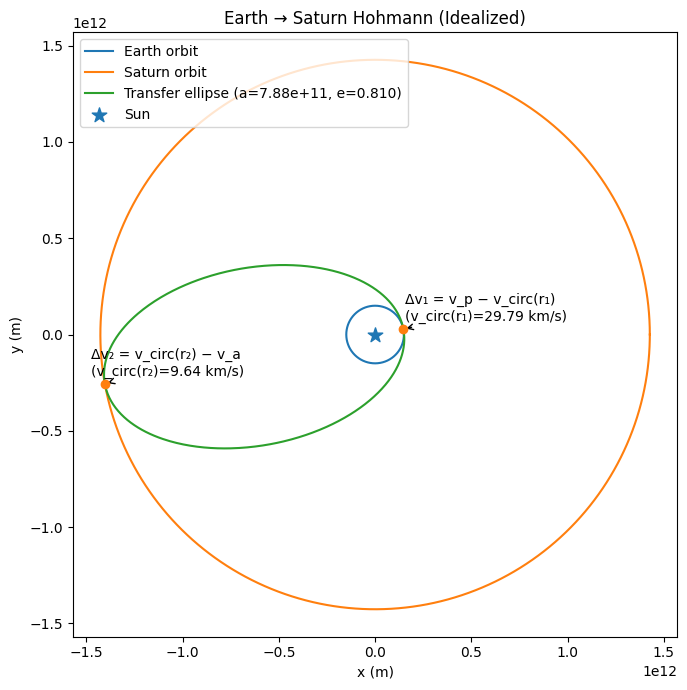

In [7]:
######## Plotting function for Hohmann transfer ellipse and orbits ##############
######## Do not edit below this line, unless you want to adjust the appearance ########



def orbit_ellipse_xy(a, e, num=900):
    nu = np.linspace(0, 2*np.pi, num, endpoint=True)
    r = a*(1 - e**2)/(1 + e*np.cos(nu))
    return r*np.cos(nu), r*np.sin(nu)

def plot_hohmann_system(r1, r2, mu, title="Earth → Saturn Hohmann (Idealized)"):
    out = hohmann_outer(r1, r2, mu)
    if out[0] is None:
        print("Complete hohmann_outer() first."); return
    a_t, e_t, t_t, v_p, v_a, dv1, dv2 = out

    # circular orbits
    x1,y1 = orbit_circle_xy(r1); x2,y2 = orbit_circle_xy(r2)

    # phasing: compute wait and launch orientation
    n1 = np.sqrt(mu / r1**3); n2 = np.sqrt(mu / r2**3)
    # NOTE: phi_now must be defined by the caller/environment (radians)
    t_wait = wait_time_to_alignment(r1, r2, mu, phi_now)
    theta0 = n1 * t_wait  # rotate frames so perihelion aligns with Earth-at-launch

    # transfer ellipse rotated by theta0
    xt, yt = orbit_ellipse_xy(a_t, e_t)
    c0, s0 = np.cos(theta0), np.sin(theta0)
    xtR = c0*xt - s0*yt
    ytR = s0*xt + c0*yt

    # perihelion/aphelion points rotated
    P = (r1*np.cos(theta0),  r1*np.sin(theta0))      # perihelion at launch
    A = (-r2*np.cos(theta0), -r2*np.sin(theta0))     # aphelion at arrival

    plt.figure(figsize=(7,7))
    plt.plot(x1,y1,label="Earth orbit")
    plt.plot(x2,y2,label="Saturn orbit")
    plt.plot(xtR,ytR,label=f"Transfer ellipse (a={a_t:.2e}, e={e_t:.3f})")
    plt.scatter([0],[0],marker="*",s=120,label="Sun")
    plt.scatter([P[0],A[0]],[P[1],A[1]],zorder=5)

    # Speed captions at endpoints (anchor relative to rotated points)
    v1_c = v_circ(r1,mu)/1000; v2_c = v_circ(r2,mu)/1000
    plt.annotate(f"Δv₁ = v_p − v_circ(r₁)\n(v_circ(r₁)={v1_c:.2f} km/s)",
                 xy=P, xytext=(P[0]*1.05, P[1] + 0.3*r1), arrowprops=dict(arrowstyle="->"))
    plt.annotate(f"Δv₂ = v_circ(r₂) − v_a\n(v_circ(r₂)={v2_c:.2f} km/s)",
                 xy=A, xytext=(A[0]*1.05, A[1] + 0.3*r1), arrowprops=dict(arrowstyle="->"))

    plt.gca().set_aspect("equal","box"); plt.xlabel("x (m)"); plt.ylabel("y (m)")
    plt.title(title); plt.legend(); plt.tight_layout(); plt.show()


plot_hohmann_system(r_earth, r_saturn, mu)


## Optional Animation — Delayed Launch & Rendezvous

The craft **waits** at Earth until the phasing angle is correct, then departs and coasts on the transfer ellipse to aphelion. The caption shows **time (years)** and whether we are waiting or transferring.


In [8]:
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Keep inline JS mode if you like; Jupyter will render the returned anim object
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 100  # MB

# def animate_delayed_launch(r1, r2, mu, phi_now, frames=1200, interval=30):
   #  """
   #  Outer Hohmann with launch delay — same behavior as your old animation,
   #  with ONLY these corrections:
    #   - Rotate transfer by Earth's launch angle theta0 so rendezvous is correct.
    #   - Do NOT call to_jshtml(); just return the animation object.
    # """

    # --- Transfer parameters (unchanged) ---
  #   out = hohmann_outer(r1, r2, mu)
  #   if out[0] is None:
  #       print("Complete hohmann_outer() first.")
  #       return None
  #   a_t, e_t, t_t, v_p, v_a, dv1, dv2 = out

    # --- Wait time (use your existing helper) ---
   #  t_wait = wait_time_to_alignment(r1, r2, mu, phi_now)
  #   if t_wait is None or np.isinf(t_wait):
   #      print("Cannot compute wait time (check mu/radii/phi_now).")
   #      return None

    # --- Mean motions (unchanged) ---
   #  n1 = np.sqrt(mu / r1**3)   # inner mean motion (rad/s)
   #  n2 = np.sqrt(mu / r2**3)   # outer mean motion (rad/s)

    # --- Total duration & timeline (unchanged) ---
   #  t_total = float(t_wait + t_t)
   #  times = np.linspace(0.0, t_total, int(frames))

    # Ellipse radius as function of true anomaly (unchanged)
   #  def r_on_ellipse(a, e, nu):
   #      return a * (1 - e**2) / (1 + e * np.cos(nu))

    # --- NEW: launch orientation (Earth angle at launch) ---
  #   theta0 = n1 * t_wait  # rotate transfer so perihelion aligns with Earth-at-launch

    # --- Figure & static scene (same look) ---
  #   fig, ax = plt.subplots(figsize=(7, 7))
  #   ax.set_aspect("equal", "box")
  #   ax.set_xlabel("x (m)")
  #   ax.set_ylabel("y (m)")
   #  try:
   #      title_text = f"Delayed Launch — {GROUP_CODE}"
   #  except NameError:
  #       title_text = "Delayed Launch"
  #   ax.set_title(title_text)

    # Orbits (unchanged)
  #   xE, yE = orbit_circle_xy(r1)
   #  ax.plot(xE, yE, alpha=0.5, label="Earth orbit")
#     xS, yS = orbit_circle_xy(r2)
  #   ax.plot(xS, yS, alpha=0.5, label="Saturn orbit")

    # Transfer ellipse (ROTATED by theta0 so rendezvous is correct)
  #   xt, yt = orbit_ellipse_xy(a_t, e_t, num=900)
  #   c0, s0 = np.cos(theta0), np.sin(theta0)
  #   xtR = c0*xt - s0*yt
  #   ytR = s0*xt + c0*yt
  #   ax.plot(xtR, ytR, label=f"Transfer ellipse (a={a_t:.2e}, e={e_t:.3f})")

    # Artists to update (unchanged)
   #  pE, = ax.plot([], [], "o", label="Earth")
  #   pS, = ax.plot([], [], "o", label="Saturn")
  #  pC, = ax.plot([], [], "o", label="Spacecraft")
   #  info = ax.text(0.02, 0.98, "", transform=ax.transAxes, va="top", ha="left")
  #  ax.legend(loc="lower right")

  #   pad = 0.15 * r2
   #  ax.set_xlim(-r2 - pad, r2 + pad)
   #  ax.set_ylim(-r2 - pad, r2 + pad)

  #   seconds_per_year = 365.25 * 24 * 3600.0

  #   def init():
  #       pE.set_data([], []); pS.set_data([], []); pC.set_data([], [])
   #      info.set_text("")
   #      return pE, pS, pC, info

  #   def update(i):
      #   t = times[i]
        # Planet angles (unchanged frame)
       #  thE = n1 * t
      #   thS = phi_now + n2 * t
        # Planet positions
      #   x_e, y_e = r1 * np.cos(thE), r1 * np.sin(thE)
      #   x_s, y_s = r2 * np.cos(thS), r2 * np.sin(thS)
      #   pE.set_data([x_e], [y_e])
      #   pS.set_data([x_s], [y_s])

        # Spacecraft: wait, then traverse the ROTATED transfer
       #  if t < t_wait:
         #    x_c, y_c = x_e, y_e
          #   phase = "waiting"
      #   else:
         #    s  = min((t - t_wait) / max(t_t, 1e-12), 1.0)  # normalized 0..1
          #   nu = s * np.pi                                 # true anomaly along transfer
         #    r  = r_on_ellipse(a_t, e_t, nu)
            # NEW: rotate by theta0 so perihelion is along Earth-at-launch
         #   x_c = r * np.cos(theta0 + nu)
          #   y_c = r * np.sin(theta0 + nu)
          #   phase = "transfer"

      #   pC.set_data([x_c], [y_c])
     #    info.set_text(f"t = {t/seconds_per_year:5.2f} yr  |  {phase}")
      #   return pE, pS, pC, info

  #   anim = FuncAnimation(fig, update, frames=len(times), init_func=init, interval=interval, blit=False)

  #   plt.close(fig) 
  #   return anim

# Example call (same as before)
# animate_delayed_launch(r_earth, r_saturn, mu, phi_now, frames=1200, interval=30)

# animate_delayed_launch(r_earth, r_saturn, mu, phi_now, frames=1200, interval=30)

In [9]:
#Uncomment to save as a GIF (requires pillow package)
# %pip install pillow
# anim = animate_delayed_launch(r_earth, r_saturn, mu, phi_now, frames=1200, interval=30)
# fps = max(int(1000 / anim.event_source.interval), 1)
# anim.save("delayed_launch.gif", writer="pillow", fps=fps)



---

### Assumptions & Limitations
- Circular, coplanar orbits; Sun‑only gravity; impulsive burns; no inclination change; planets treated as circles.  

